# Homework 2.1 - implement N-gram count

Given a text document, implement a python function to collect n-gram counts from the text. First download your datasets of your choice from project Gutenberg. Or you can load it from the URL directly usng the method from NLTK book (https://www.nltk.org/book/ch03.html).

0. Each team should first decide on two books to download frm project Gutenburg(https://www.gutenberg.org). Use wget (example below) to download the txt version of the books. 

1. Please implement your data loading and text cleaning (preprocessing) as well as n-gram count methods in the following class. Feel free to add methods as you need. You can do some exploration to decide level of text cleaning needed. The simplest would be to remove all punctuations, arabic numbers, etc. You can use simple python method, regular expressions, etc. Manually inspect the outcome of your text cleaning. Is it what you expected?

2. Example usage of the class is provided. 

3. Run your code and collect n-gram counts from the book. Print out the top ten unigrams, bigrams and trigrams and their counts. 

4. Plot a histogram of the top 50 unigram, bigrams and trigrams and their counts. What do you observe in the distribution?

5. Repeat steps 1-5 on both books.

In [1]:
conda install -c anaconda wget

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c anaconda nltk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import wget

In [4]:
import nltk

### Book 1: The Food Elements

In [5]:
url = "https://www.gutenberg.org/cache/epub/12238/pg12238-images.html#The_Food_Elements"
bookOne = wget.download(url)

100% [......................................................] 1926082 / 1926082

### Book 2: Common Diseases of Farm Animals

In [6]:
url = "https://www.gutenberg.org/cache/epub/8502/pg8502.txt"
bookTwo = wget.download(url)

100% [........................................................] 566563 / 566563

In [7]:
from collections import defaultdict
import re
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup  #usually used to clean up html tags
from nltk.stem import WordNetLemmatizer 
import html

class NgramCount:
    def __init__(self):
        # init
        self.text=""
        
    def collect_ngram_count(self, n:int):
        """method to collect n-gram counts from text
        Args:
            text: input text document string
            n: n-gram (e.g., 2-gram, 3-gram, etc)
        Returns:
            dict of n-gram counts. e.g., if n==2, 
            the dict keys are all possible bigrams strings from the document, 
            and the values indicate the number of times that bigram appeared in the document
        """
        
        tokenList = self.preprocess() 
        ngramList = []   #initializing the ngram list to then use for storage
        
        
        #iterating through the tokens until the specified n count
        for i in range(len(tokenList)-n+1):
            ngram = tuple(tokenList[i:i+n])   #this works life a sliding window
            ngramList.append(ngram)  #storing the tokens 
            
        #counting the ngram's count in the text
        ngram_cnt = defaultdict(int)  #this handles the case when the key is not there
        for i in ngramList:
            ngram_cnt[i]+=1  #because we used the defaultdict, if the key does not exist, it will put value of 0 because we initialized it as int
        
        return ngram_cnt
    
    def file_reader(self, file_name:str):
        """method to read text file into string
        Args: 
            file_name: the file name of the document you want to process
        Returns: 
            nothing, but the class variable self.text should be updated to reflect
            a string representation of the entire document 
             
        """
        
        with open(file_name, "r", encoding="utf-8") as file:
            self.text = file.read()
        
    def preprocess(self):
        """method for preprocessing the text, including cleaning up the text, tokenize it, etc., using 
        regular expression tools. 
        Returns:
            a clean list of tokens in the text document, e.g., 
            ['The','Project','Gutenberg','eBook','of','Moby-Dick','or','The','Whale','by','Herman','Melville',...]
        """
        #making all the text lowercase
        lower_text = self.text.lower()
        
        #clean up html tags
        noHtmlText = BeautifulSoup(lower_text, 'html.parser').get_text()
        
        #remove URLs, including anything with www ... -- my first book of choice was retrieved from the html
        noUrlsText = re.sub(r'http\S+|www\.\S+', '', noHtmlText)
        
        #handling escape sequences after the html tag cleaning
        decoded_text = html.unescape(noUrlsText)
        
        #removing any non letter/numeric characters (does not include spaces)
        filtered_text = re.sub(r'[^a-zA-Z0-9\s]', '', decoded_text)
        
        #remove punctuation using re 
        noPunctText = re.sub(r'[^\w\s]', '', filtered_text)
        
        #handling cases of emoji - source: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1
        EMOJI_PATTERN = re.compile(
        "(["
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "])"
      )
        noEmojiText = re.sub(EMOJI_PATTERN, r' \1 ', noPunctText)
        
        #removing multiple spaces
        cleanText = re.sub(r' +', ' ', noEmojiText)
        
        #stemming/lemmatization 
        lemmatizer = WordNetLemmatizer()
        stemmedText = lemmatizer.lemmatize(cleanText)
        
        #tokenizing
        tokens = word_tokenize(stemmedText)
        return tokens   

## Example Usage
```
nc=NgramCount()
nc.file_reader("2701-0.txt")
nc.preprocess()
nc.collect_ngram_count(2)
```
            

## Book 1: The Food Elements

### Reading, Preprocessing and collecting ngram counts for Book 1: The Food Elements

In [34]:
nc = NgramCount()
nc.file_reader(bookOne)
# nc.preprocess()
# nc.collect_ngram_count(2)

### Question 3: Print out the top ten unigrams, bigrams and trigrams and their counts.

#### Book 1: Unigrams Top 10

In [35]:
#Book 1 - The food elements
top_10_unigrams = sorted(nc.collect_ngram_count(1).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_unigrams:
    print(f"{ngram}: {count}")

('the',): 12169
('of',): 8522
('and',): 7387
('a',): 5846
('to',): 4480
('in',): 4139
('with',): 2917
('is',): 2726
('be',): 2564
('for',): 2260


#### Book 1: Bigram Top 10


In [36]:
#Book 1 - Recipe book
top_10_bigrams = sorted(nc.collect_ngram_count(2).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_bigrams:
    print(f"{ngram}: {count}")

('of', 'the'): 1578
('in', 'the'): 978
('in', 'a'): 776
('may', 'be'): 684
('stewed', 'fruit'): 660
('with', 'a'): 569
('to', 'the'): 539
('it', 'is'): 524
('should', 'be'): 524
('cup', 'of'): 457


#### Book 1 Trigrams Top 10

In [37]:
#Book 1 - Recipe book
top_10_trigrams = sorted(nc.collect_ngram_count(3).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_trigrams:
    print(f"{ngram}: {count}")

('breakfast', 'fresh', 'fruit'): 361
('stewed', 'fruit', 'dinner'): 317
('day', 'breakfast', 'fresh'): 309
('a', 'cup', 'of'): 189
('a', 'pint', 'of'): 178
('half', 'cup', 'of'): 136
('toasted', 'wafers', 'stewed'): 127
('of', 'boiling', 'water'): 117
('wafers', 'stewed', 'fruit'): 117
('apples', 'stewed', 'fruit'): 113


### Question 4 - The Food Elements: Plot a histogram of the top 50 unigram, bigrams and trigrams and their counts. What do you observe in the distribution?

In [38]:
from matplotlib import pyplot as plt
import numpy as np

In [39]:
top_50_unigrams = sorted(nc.collect_ngram_count(1).items(), key=lambda x: x[1], reverse=True)[:50]
top_50_bigrams = sorted(nc.collect_ngram_count(2).items(), key=lambda x: x[1], reverse=True)[:50]
top_50_trigrams = sorted(nc.collect_ngram_count(3).items(), key=lambda x: x[1], reverse=True)[:50]

In [40]:
unigrams = [str(item[0]) for item in top_50_unigrams]
unigram_counts = [item[1] for item in top_50_unigrams]

bigrams = [' '.join(map(str, item[0])) for item in top_50_bigrams]
bigram_counts = [item[1] for item in top_50_bigrams]

trigrams = [' '.join(map(str, item[0])) for item in top_50_trigrams]
trigram_counts = [item[1] for item in top_50_trigrams]


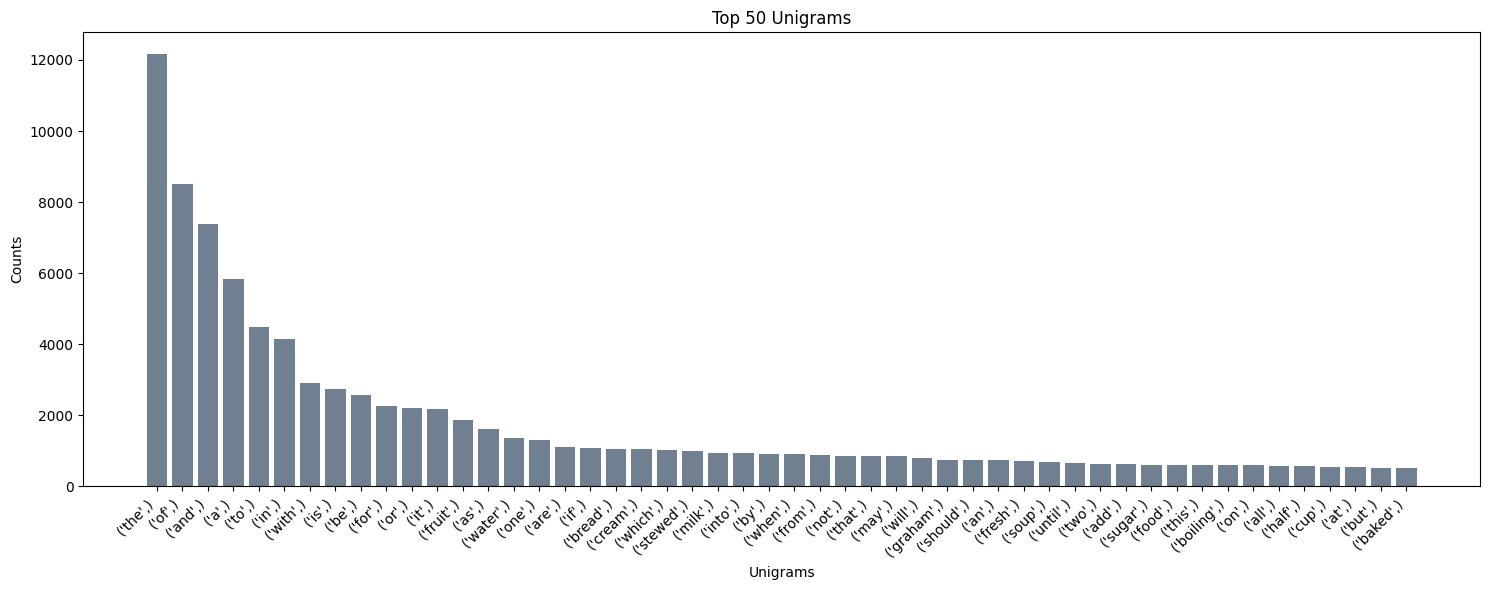

In [41]:
# Unigram top 50 plotted
unigrams = [str(item[0]) for item in top_50_unigrams]
# Plotting Unigrams
plt.figure(figsize=(15, 6))
plt.bar(unigrams, unigram_counts, color='slategray')
plt.title('Top 50 Unigrams')
plt.ylabel('Counts')
plt.xlabel('Unigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


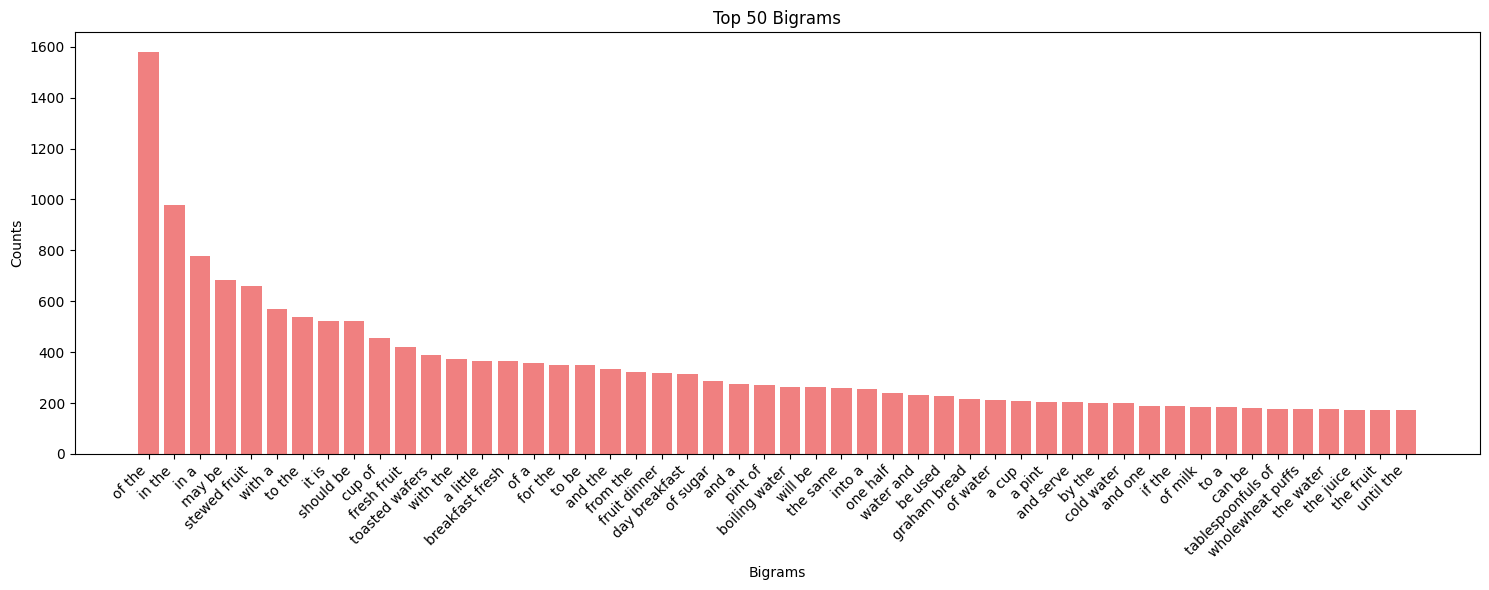

In [42]:
#plotting thetop 50 bigrams
bigrams = [' '.join(map(str, item[0])) for item in top_50_bigrams]


# Plotting Bigrams
plt.figure(figsize=(15, 6))
plt.bar(bigrams, bigram_counts, color='lightcoral')
plt.title('Top 50 Bigrams')
plt.ylabel('Counts')
plt.xlabel('Bigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

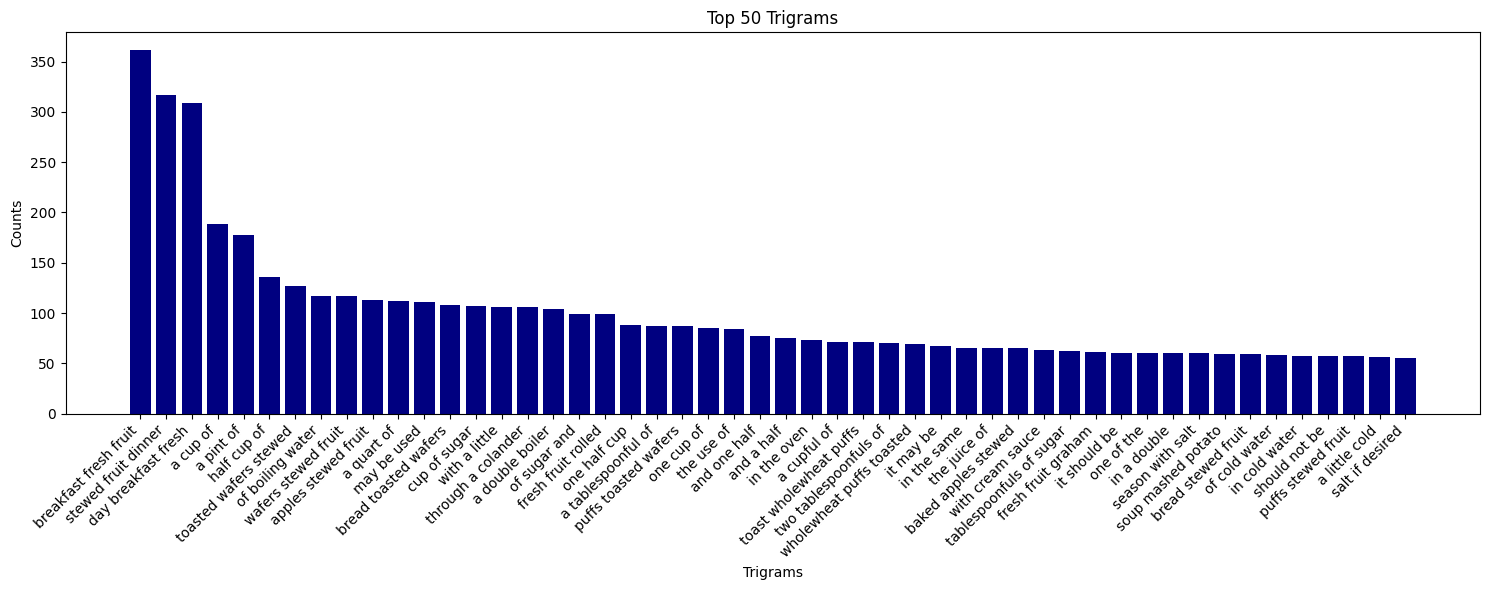

In [43]:
#plotting the trigrams
trigrams = [' '.join(map(str, item[0])) for item in top_50_trigrams]
# Plotting Trigrams
plt.figure(figsize=(15, 6))
plt.bar(trigrams, trigram_counts, color='navy')
plt.title('Top 50 Trigrams')
plt.ylabel('Counts')
plt.xlabel('Trigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


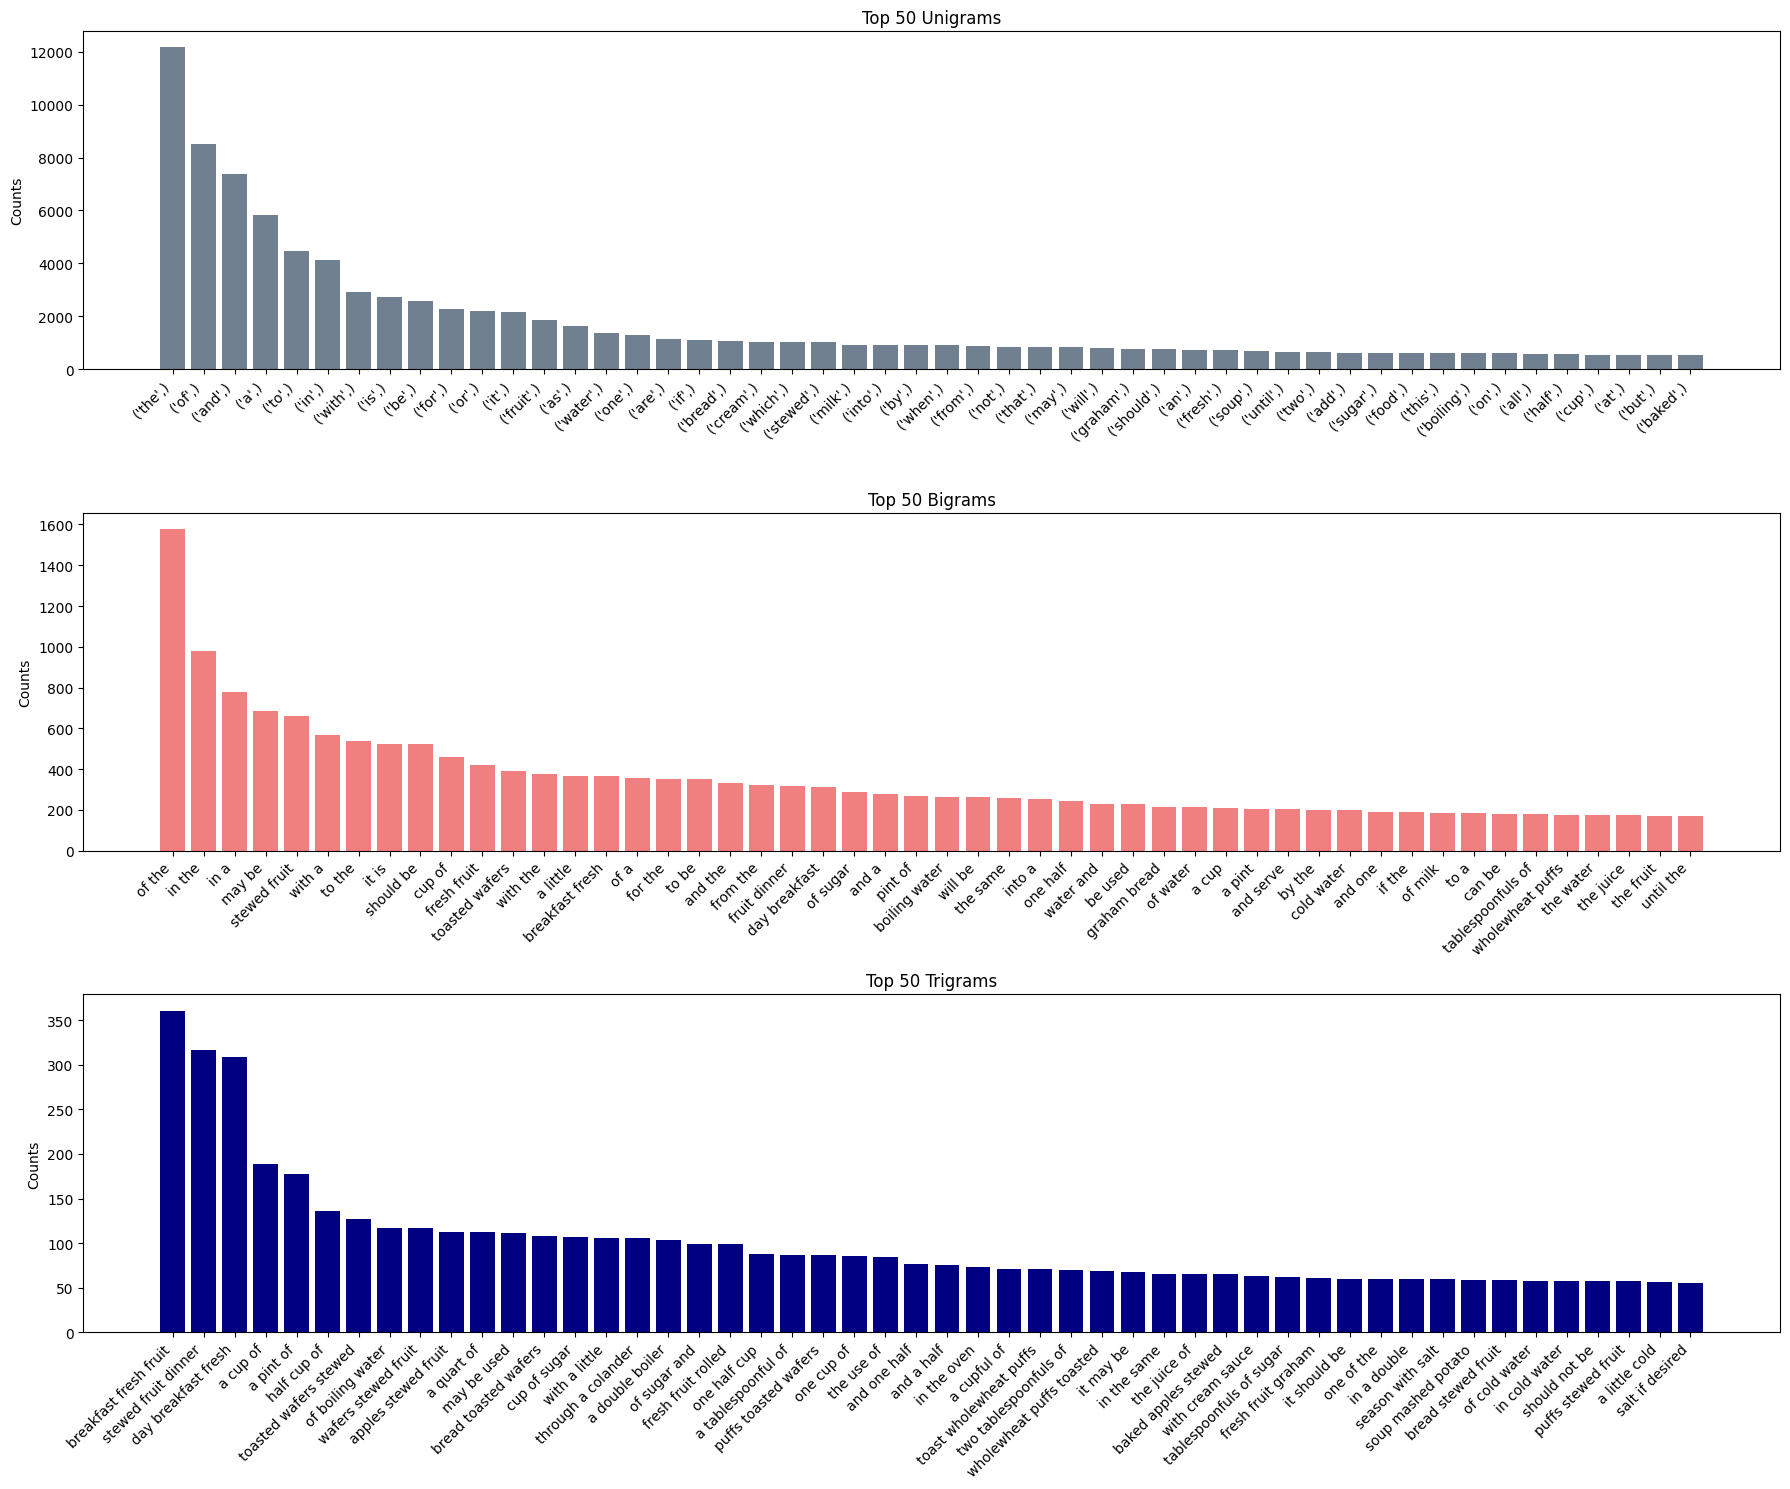

In [44]:
#below is showing all three plots as a subplot 

plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
plt.bar(unigrams, unigram_counts, color='slategray')
plt.title('Top 50 Unigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 2)
plt.bar(bigrams, bigram_counts, color='lightcoral')
plt.title('Top 50 Bigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 3)
plt.bar(trigrams, trigram_counts, color='navy')
plt.title('Top 50 Trigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Book 2 Common Diseases of Farm Animals

### Reading, Preprocessing and Collecting ngram counts for Book 2: Common Diseases of Farm Animals

In [45]:
ncTwo = NgramCount()
ncTwo.file_reader(bookTwo)
# ncTwo.preprocess()
# # ncTwo.collect_ngram_count(2)

### Question 3: Print out the top ten unigrams, bigrams and trigrams and their counts.

In [46]:
#Book 2 - Disease among the Farm Animals

top_10_unigrams = sorted(ncTwo.collect_ngram_count(1).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_unigrams:
    print(f"{ngram}: {count}")

('the',): 9920
('of',): 4569
('and',): 3474
('in',): 2206
('is',): 2134
('a',): 1749
('to',): 1672
('be',): 1243
('or',): 1193
('may',): 1083


In [47]:
#Book 2 - Disease among the Farm Animals

top_10_bigrams = sorted(ncTwo.collect_ngram_count(2).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_bigrams:
    print(f"{ngram}: {count}")

('of', 'the'): 2200
('in', 'the'): 857
('may', 'be'): 526
('and', 'the'): 468
('should', 'be'): 421
('the', 'animal'): 384
('to', 'the'): 381
('it', 'is'): 359
('the', 'disease'): 217
('from', 'the'): 216


In [48]:
#Book 2 - Common Diseases of Farm Animals

top_10_trigrams = sorted(ncTwo.collect_ngram_count(3).items(),key=lambda x: x[1], reverse=True)[:10]
for ngram, count in top_10_trigrams:
    print(f"{ngram}: {count}")

('inflammation', 'of', 'the'): 99
('of', 'the', 'disease'): 98
('portion', 'of', 'the'): 74
('it', 'may', 'be'): 73
('the', 'animal', 'is'): 68
('region', 'of', 'the'): 67
('may', 'be', 'given'): 65
('the', 'region', 'of'): 58
('diseases', 'of', 'the'): 55
('of', 'the', 'skin'): 53


### 4. Plotting Histograms for Book 2: Common Diseases of Farm Animals

In [49]:
top_50_unigrams2 = sorted(ncTwo.collect_ngram_count(1).items(), key=lambda x: x[1], reverse=True)[:50]
top_50_bigrams2 = sorted(ncTwo.collect_ngram_count(2).items(), key=lambda x: x[1], reverse=True)[:50]
top_50_trigrams2 = sorted(ncTwo.collect_ngram_count(3).items(), key=lambda x: x[1], reverse=True)[:50]

In [50]:
unigrams2 = [str(item[0]) for item in top_50_unigrams2]
unigram_counts2 = [item[1] for item in top_50_unigrams2]

bigrams2 = [' '.join(map(str, item[0])) for item in top_50_bigrams2]
bigram_counts2 = [item[1] for item in top_50_bigrams2]

trigrams2 = [' '.join(map(str, item[0])) for item in top_50_trigrams2]
trigram_counts2 = [item[1] for item in top_50_trigrams2]


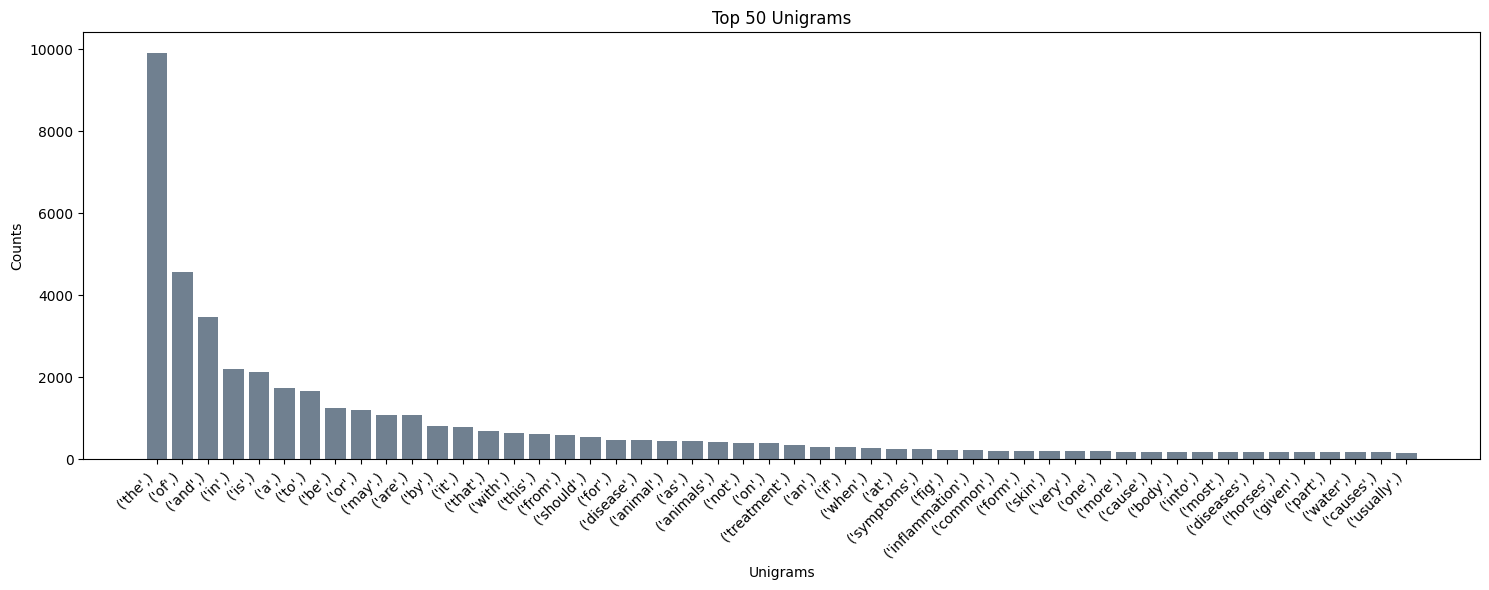

In [51]:
# Unigram top 50 plotted
# unigrams = [str(item[0]) for item in top_50_unigrams2]
# Plotting Unigrams
plt.figure(figsize=(15, 6))
plt.bar(unigrams2, unigram_counts2, color='slategray')
plt.title('Top 50 Unigrams')
plt.ylabel('Counts')
plt.xlabel('Unigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

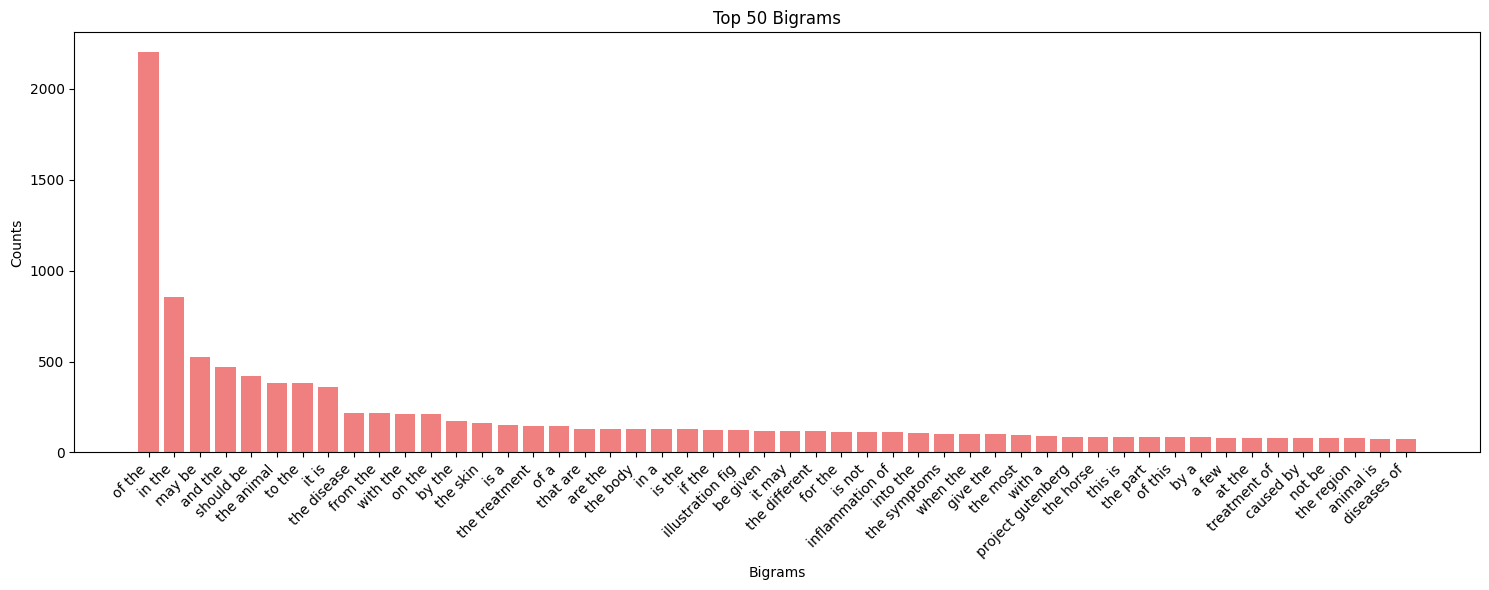

In [52]:
plt.figure(figsize=(15, 6))
plt.bar(bigrams2, bigram_counts2, color='lightcoral')
plt.title('Top 50 Bigrams')
plt.ylabel('Counts')
plt.xlabel('Bigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

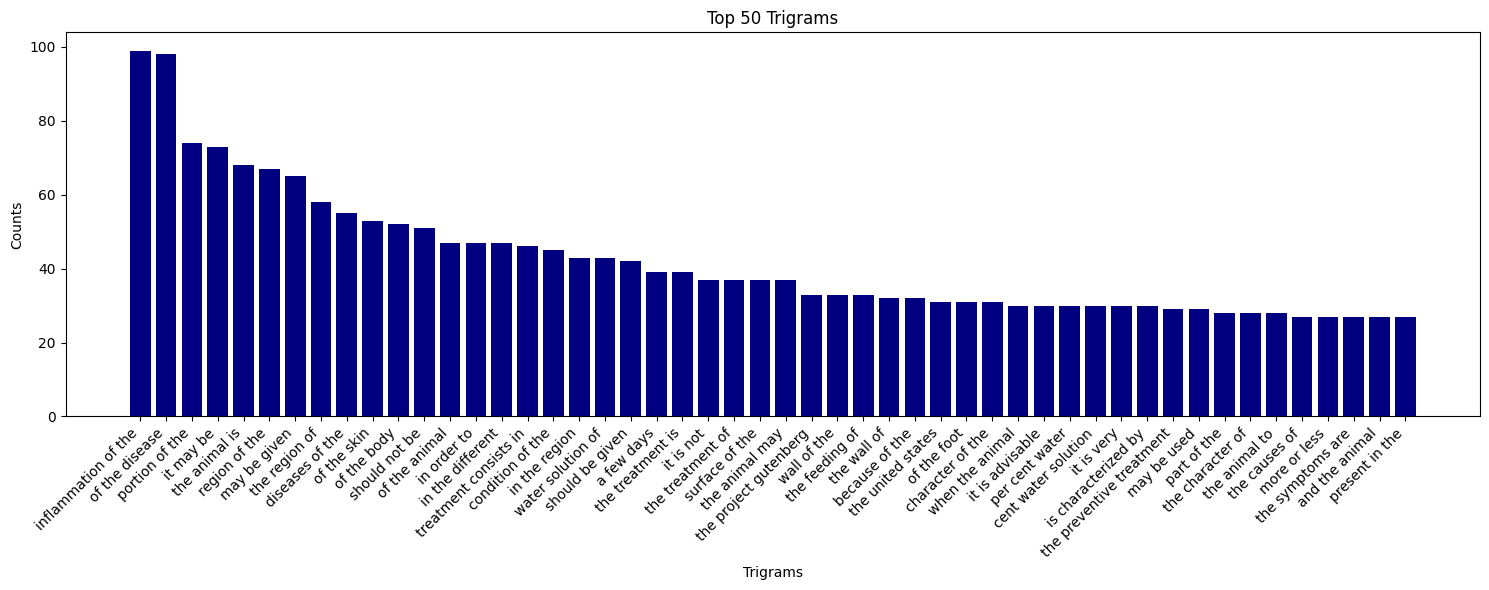

In [53]:

plt.figure(figsize=(15, 6))
plt.bar(trigrams2, trigram_counts2, color='navy')
plt.title('Top 50 Trigrams')
plt.ylabel('Counts')
plt.xlabel('Trigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

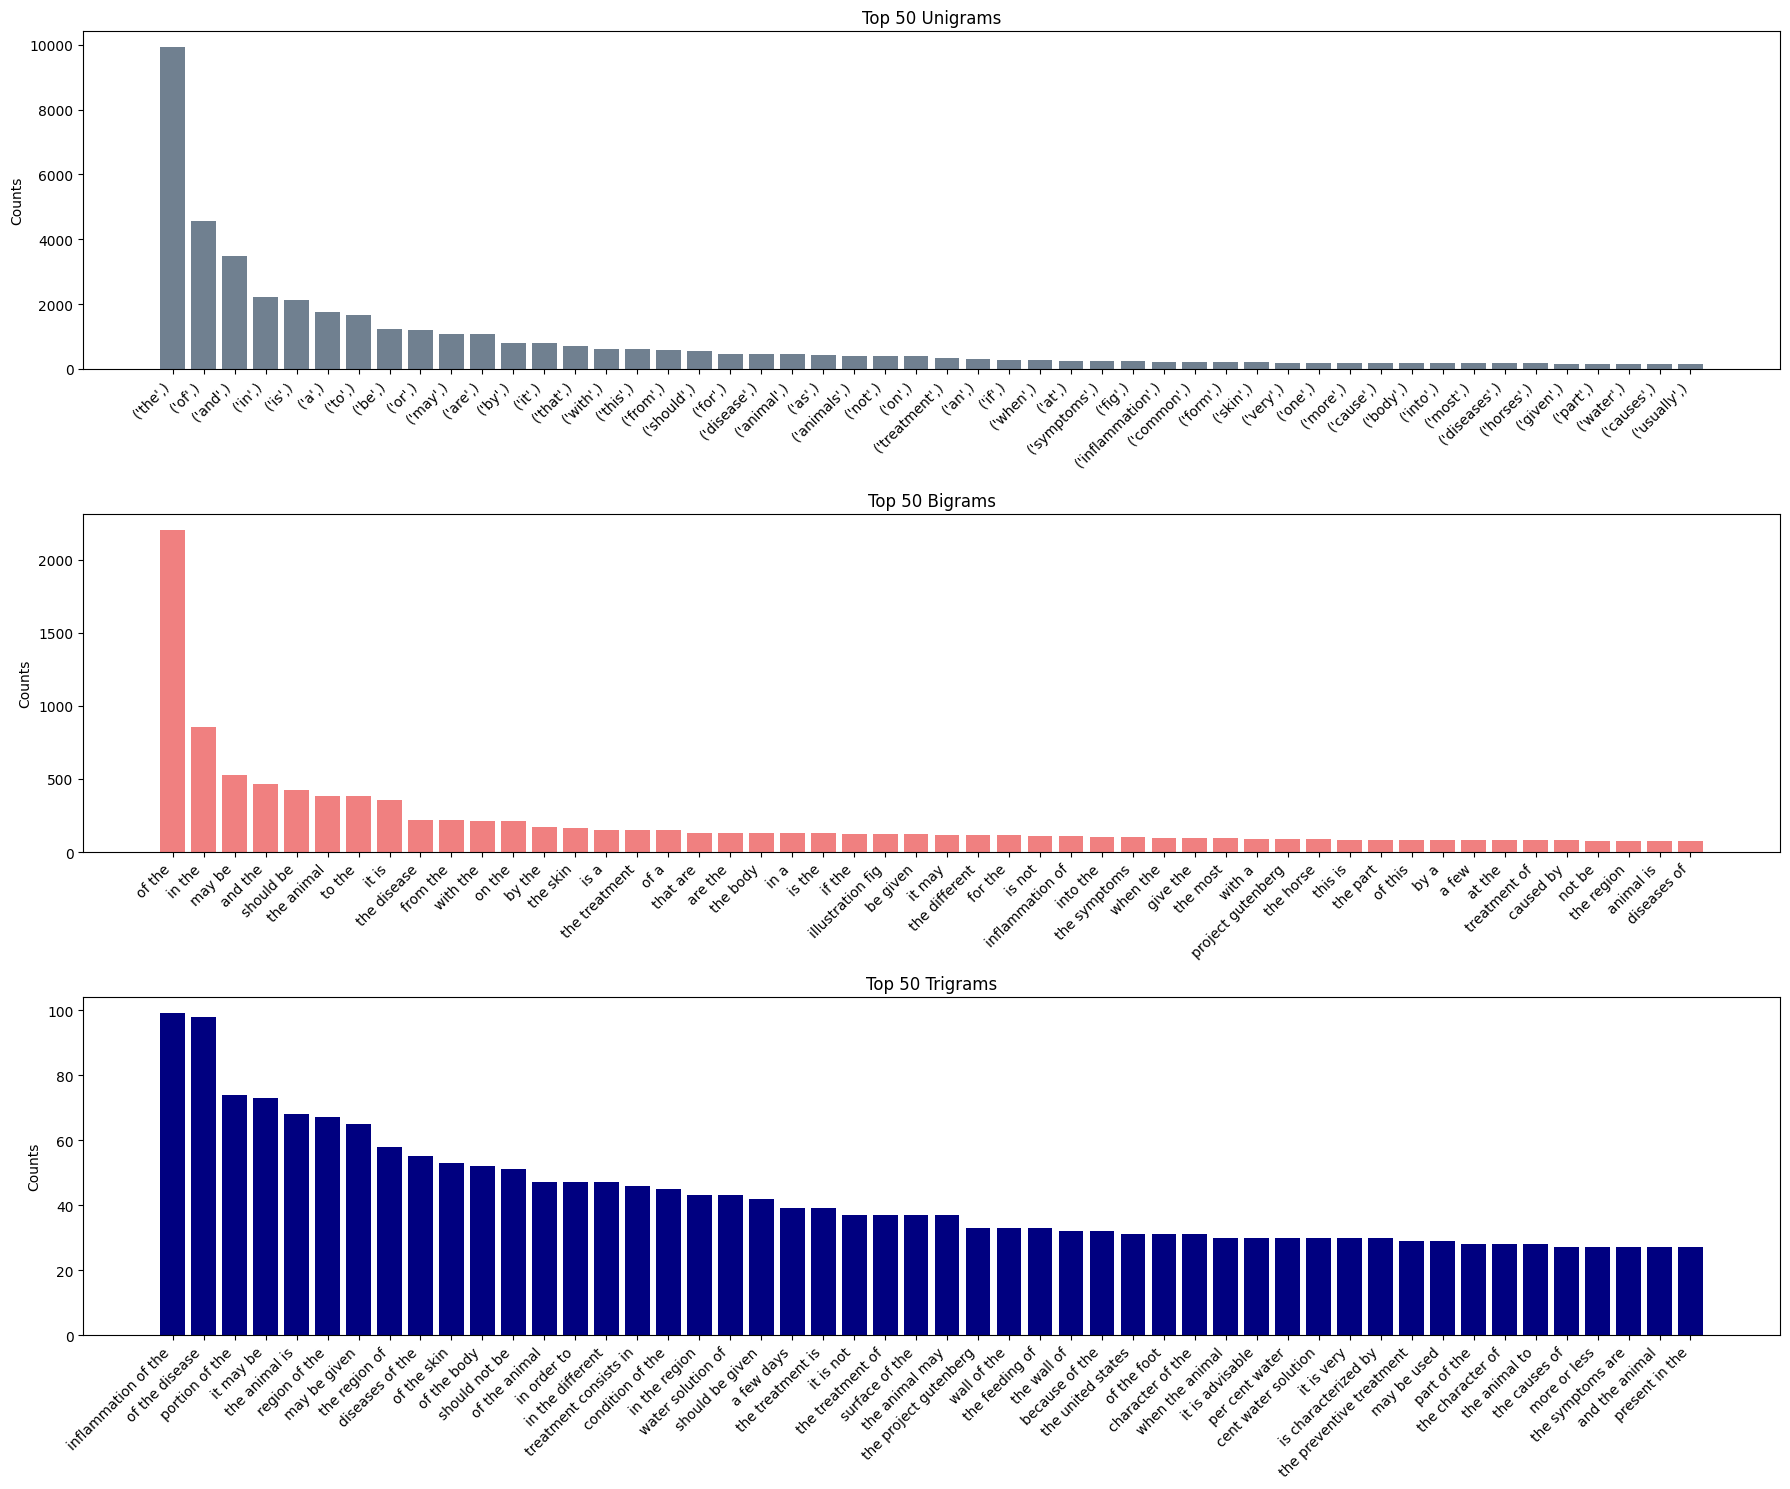

In [54]:
#below is showing all three plots as a subplot for book 2

plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
plt.bar(unigrams2, unigram_counts2, color='slategray')
plt.title('Top 50 Unigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 2)
plt.bar(bigrams2, bigram_counts2, color='lightcoral')
plt.title('Top 50 Bigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 3)
plt.bar(trigrams2, trigram_counts2, color='navy')
plt.title('Top 50 Trigrams')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### 4.1 Observation of the distribution

When observing the distribution, we can notice a similar skewness among the three histograms. We notice that while there are certain phrases (in the case of bigrams and trigrams) and words (in the case of unigrams) that have very high frequency, this is not common along the rest of the ngrams. There is a rightward skewness. The frequencies also differ as we transition to more complex combination of words as in from unigrams to bigrams to trigrams. The unigrams have words that reach a frequency of 12000 while in the case of the trigrams the highest frequency noted is 350. This is not surprising as we can notice that the more words combined we are observing in an ngram, the fewer we will find those appear in a context of a book. 
I also noticed that the distributions are different with the books. In the second book, it seems that the frequency of trigrams is closer in the numbers compared to the first book where the frequencies varied by a lot.

